# Plot spatial data for 20CR


In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

In [3]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/20CR_TMP_seasonal_data_for_plots/'

In [7]:
# open mmm of temperature 
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_anom_glob.nc')
mmm_mon_Glob

<xarray.Dataset>
Dimensions:     (lat: 256, lon: 512, season: 4, seasonyear: 167)
Coordinates:
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon         (lon) float32 0.0 0.703 1.406 2.109 ... 357.1 357.8 358.5 359.2
  * lat         (lat) float32 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * seasonyear  (seasonyear) int64 1850 1851 1852 1853 ... 2013 2014 2015 2016
Data variables:
    tmp         (seasonyear, season, lat, lon) float32 ...

In [8]:
# select out dates around kraktoa eruption 
K_mmm_mon_Glob = mmm_mon_Glob.sel(seasonyear = slice('1880','1990'))

In [9]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/20CR_data_netcdfs/land_20CR.nc')
landmask = landfrac_ds

In [10]:
# Select out SH and NH anomalies 
K_mmm_mon_SH = K_mmm_mon_Glob.sel(lat=slice(0,-90)) 
K_mmm_mon_NH = K_mmm_mon_Glob.sel(lat=slice(90,0)) 
# select out the Australian and E Australian anomalies 
K_mmm_mon_Aus = K_mmm_mon_Glob.sel(lat=slice(-10,-50), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_mon_EA = K_mmm_mon_Glob.sel(lat=slice(-5,-50), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [11]:
K_mmm_mon_Aus

<xarray.Dataset>
Dimensions:     (lat: 44, lon: 57, season: 4, seasonyear: 111)
Coordinates:
  * lat         (lat) float64 -10.18 -11.58 -12.28 ... -41.75 -42.46 -43.16
  * lon         (lon) float64 113.9 114.6 115.3 116.0 ... 151.8 152.6 153.3
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * seasonyear  (seasonyear) int64 1880 1881 1882 1883 ... 1987 1988 1989 1990
Data variables:
    tmp         (seasonyear, season, lat, lon) float32 nan nan nan ... nan nan

## Figures

In [36]:
# dates and title for eruption and 3 times after
# K_dates winter
K_dates_w = [1883, 1884, 1885, 1886]
#K_dates_w = ['1883', '1884', '1885', '1886']
# K_dates_summer
K_dates_s = [1882, 1883, 1884, 1885]
#K_dates_s = ['1882', '1883', '1884', '1885']

In [17]:
def seasonal_title(K_dates, season_name, season):
    """Create titles for graphs by combining strings for each year, season post-eruption.  
    
    Args:
        K_dates (list): list of years to be plotted
        title_label (list): list of summer relative to eruption
        season_name(list): season name (e.g. 'summer')
        season (list): season (e.g. 'DJF')
    """
    title_label = [f'{season} prior to eruption, ', f'1st {season} post-eruption, ', f'2nd {season} post-eruption, ', 
               f'3rd {season} post-eruption, ']
    
    titles=[]
    for i,vals in enumerate(K_dates):
        t = title_label[i] + season + K_dates[i]
        titles.append(t)
    
    return titles

In [21]:
# winter titles
titles_w = seasonal_title(K_dates_w, 'winter', 'JJA')
 # summer titles 
titles_s = seasonal_title(K_dates_s, 'summer', 'DJF')

In [19]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [20]:
# set the mod max for the colour bars
cmax_tmp = 2
cmax_pr = 2

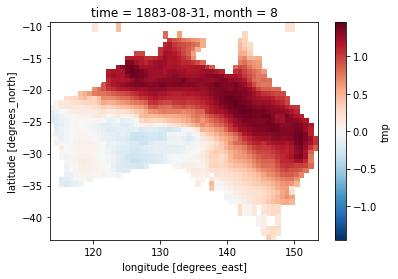

In [53]:
K_mmm_mon_Aus.sel(time=K_dates[0]).tmp.plot()

In [25]:
if hasattr(K_mmm_mon_Glob, 'seasonyear'):
    print('has time')

has time


In [30]:
fplot=reload(fplot)

## having trouble with the times in spatial plot 

In [35]:
K_mmm_mon_Glob.sel(seasonyear = 1883)#times[i])

<xarray.Dataset>
Dimensions:     (lat: 256, lon: 512, season: 4)
Coordinates:
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon         (lon) float32 0.0 0.703 1.406 2.109 ... 357.1 357.8 358.5 359.2
  * lat         (lat) float32 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
    seasonyear  int64 1883
Data variables:
    tmp         (season, lat, lon) float32 ...

## need to figure out how to make spatial plots 

In [37]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.tmp, cmax_tmp, K_dates_w, titles_w, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_JJA_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

AttributeError: 'Rectangle' object has no property 'add_colorbar'

In [ ]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.tmp, cmax_tmp, K_dates_s, titles_s, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_DJF_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


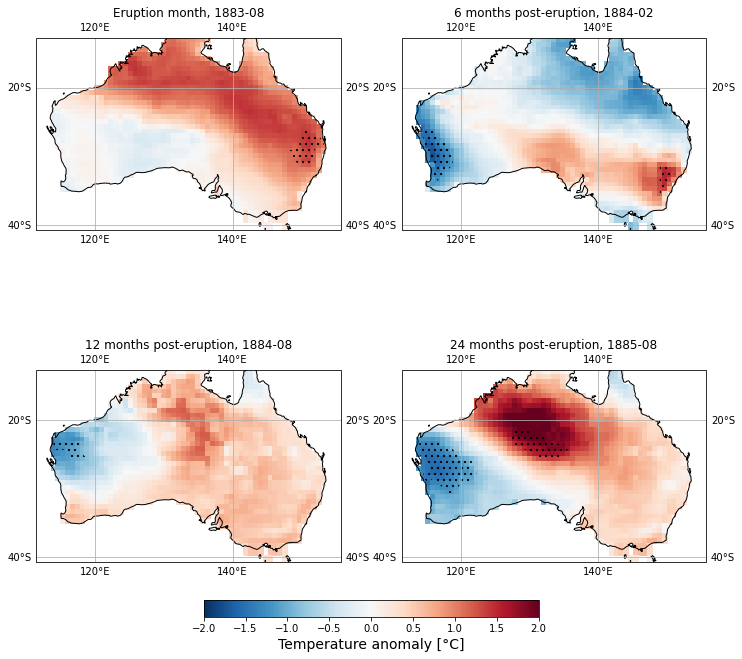

In [52]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.tmp, cmax_tmp, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_Aus.png', dpi=300, bbox_inches='tight')

In [40]:
# plot of global monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Glob.png', dpi=300)#, bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'pr'

In [41]:
# plot of Aus monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'pr'